In [7]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
# parameters
penguin_species = ['Adelie', 'Chinstrap', 'Gentoo']
k = 15

## Load and clean data

In [14]:
penguin_data = sns.load_dataset("penguins")
penguin_data = penguin_data[['flipper_length_mm', 'bill_length_mm', 'species']]
penguin_data.dropna(inplace=True)              # remove NaN data point

# print(penguin_data)

## Classify a single point by KNN

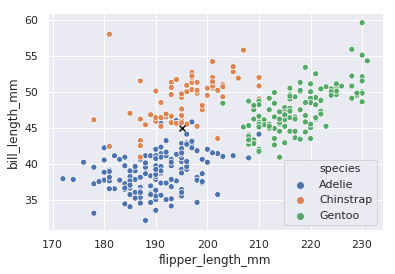

In [10]:
new_point = np.array([[195, 45]])

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.scatter(new_point[:,0], new_point[:,1], marker='x', color='k')

In [11]:
def knn(train_data, test_data, k):
	'''
		Inputs:
		- train_data is a numpy array of size (num_examples, 3)
		- test_data is a numpy array of size (num_test, 2)
	'''

	species_arr = np.zeros((len(test_data), 1), dtype=int)

	for j in range(len(test_data)):

		distance_arr = np.zeros((len(train_data), 1))

		for i in range(len(train_data)) :
			distance_arr[i,0] = np.sqrt( (test_data[j,0] - train_data.iloc[i,0])**2 + (test_data[j,1] - train_data.iloc[i,1])**2 )

		nearest_neighbor_indexes = np.argsort(distance_arr[:,0])[0:k]

		neighbor_data = train_data.iloc[nearest_neighbor_indexes, 2].tolist()
		species_count = np.zeros((3,1))

		for i in range(3):
			species_count[i,0] = neighbor_data.count(penguin_species[i])

		species_arr[j,0] = np.argmax(species_count)

	return species_arr

In [12]:
detected_arr = knn(penguin_data, new_point, k)

for j in range(len(new_point)):
	print('The predicted species is ' + penguin_species[detected_arr[j,0]])

The predicted species is Chinstrap


## Creat the whole decision map

(166.1, 236.89999999999972, 29.35, 61.80000000000003)

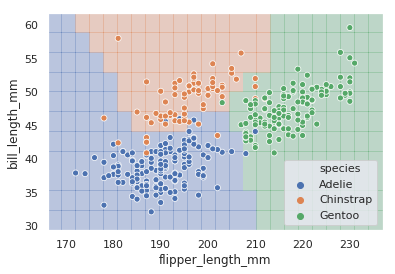

In [13]:
x_min, x_max = penguin_data.iloc[:,0].min(), penguin_data.iloc[:,0].max()
y_min, y_max = penguin_data.iloc[:,1].min(), penguin_data.iloc[:,1].max()
x_range = x_max - x_min
y_range = y_max - y_min
xx, yy = np.meshgrid(np.arange(x_min - 0.1*x_range, x_max + 0.1*x_range, x_range*0.05),
                     np.arange(y_min - 0.1*y_range, y_max + 0.1*y_range, x_range*0.05))

species_map = knn(penguin_data, np.c_[xx.ravel(), yy.ravel()], k);


# Put the result into a color plot
species_map = np.asarray(species_map).reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, species_map, alpha=0.3, edgecolors='none',
	cmap=ListedColormap(sns.color_palette().as_hex()[0:3]), vmin=0, vmax=2)

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")

plt.axis('tight')